# Random Forest Model

## Import Dependency

In [1]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(os.path.join("../NBA_Data/nbaGamesStats.csv"))
df = df.dropna()
df.head()

,ID,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,OppFreeThrows,OppFreeThrowsAttempted,OppFreeThrows_pct,OppOffRebounds,OppTotalRebounds,OppAssists,OppSteals,OppBlocks,OppTurnovers,OppTotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


## Create a Train Test Split

In [3]:
target = df["Team"]
target_names = ["ALT", "BOS","BRK","CHI","CHO",
               "CLE","DAL","DEN","DET","GSW",
                "HOU","IND","LAC","LAL","MEM",
                "MIA","MIL","MIN","NOP","NYK",
                "OKC","ORL","PHI","PHO","POR",
                "SAC","SAS","TOR","UT","WAS"]

In [4]:
data = df.drop(["ID","Date","Game","Opponent","Team"], axis=1)
feature_names = data.columns
data.head()

,Home,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals_pct,X3PointShots,X3PointShotsAttempted,X3PointShots_pct,...,OppFreeThrows,OppFreeThrowsAttempted,OppFreeThrows_pct,OppOffRebounds,OppTotalRebounds,OppAssists,OppSteals,OppBlocks,OppTurnovers,OppTotalFouls
0,Away,L,102,109,40,80,0.500,13,22,0.591,...,27,33,0.818,16,48,26,13,9,9,22
1,Home,W,102,92,35,69,0.507,7,20,0.350,...,18,21,0.857,11,44,25,5,5,18,26
2,Away,L,92,94,38,92,0.413,8,25,0.320,...,27,38,0.711,11,50,25,7,9,19,15
3,Away,L,119,122,43,93,0.462,13,33,0.394,...,20,27,0.741,11,51,31,6,7,19,30
4,Home,W,103,96,33,81,0.407,9,22,0.409,...,8,11,0.727,13,44,26,2,6,15,29


In [5]:
# Use Pandas get_dummies to convert categorical data
data = pd.get_dummies(data)
data.head()

,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals_pct,X3PointShots,X3PointShotsAttempted,X3PointShots_pct,FreeThrows,FreeThrowsAttempted,...,OppTotalRebounds,OppAssists,OppSteals,OppBlocks,OppTurnovers,OppTotalFouls,Home_Away,Home_Home,WINorLOSS_L,WINorLOSS_W
0,102,109,40,80,0.500,13,22,0.591,9,17,...,48,26,13,9,9,22,1,0,1,0
1,102,92,35,69,0.507,7,20,0.350,25,33,...,44,25,5,5,18,26,0,1,0,1
2,92,94,38,92,0.413,8,25,0.320,8,11,...,50,25,7,9,19,15,1,0,1,0
3,119,122,43,93,0.462,13,33,0.394,20,26,...,51,31,6,7,19,30,1,0,1,0
4,103,96,33,81,0.407,9,22,0.409,28,36,...,44,26,2,6,15,29,0,1,0,1


In [6]:
# Drop extra dummy columns
data = data .drop(columns=['Home_Home','WINorLOSS_L'])
data .head()

,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals_pct,X3PointShots,X3PointShotsAttempted,X3PointShots_pct,FreeThrows,FreeThrowsAttempted,...,OppFreeThrows_pct,OppOffRebounds,OppTotalRebounds,OppAssists,OppSteals,OppBlocks,OppTurnovers,OppTotalFouls,Home_Away,WINorLOSS_W
0,102,109,40,80,0.500,13,22,0.591,9,17,...,0.818,16,48,26,13,9,9,22,1,0
1,102,92,35,69,0.507,7,20,0.350,25,33,...,0.857,11,44,25,5,5,18,26,0,1
2,92,94,38,92,0.413,8,25,0.320,8,11,...,0.711,11,50,25,7,9,19,15,1,0
3,119,122,43,93,0.462,13,33,0.394,20,26,...,0.741,11,51,31,6,7,19,30,1,0
4,103,96,33,81,0.407,9,22,0.409,28,36,...,0.727,13,44,26,2,6,15,29,0,1


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

## Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [8]:
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

## Train the Model - Random Forest

In [12]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.06788617886178862

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(X_train_minmax, y_train)
rf.score(X_test_minmax, y_test)

0.13821138211382114

In [11]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.040063471958113404, 'FieldGoals_pct'),
 (0.03521583812098245, 'FreeThrows'),
 (0.03255179044469632, 'OppFreeThrows'),
 (0.03229334675267693, 'OffRebounds'),
 (0.032212977615502875, 'X3PointShots'),
 (0.032003623749580094, 'Opp3PointShots'),
 (0.03194957792401678, 'FieldGoals'),
 (0.031695400303320805, 'OppFieldGoals'),
 (0.031430678350503324, 'OppFieldGoals_pct'),
 (0.030530198626264195, 'OpponentPoints'),
 (0.030020706826643814, 'OppOffRebounds'),
 (0.02975809420702266, 'TotalFouls'),
 (0.029720482247713096, 'WINorLOSS'),
 (0.029594045970315484, 'X3PointShots_pct'),
 (0.029549417246600557, 'Home'),
 (0.029246276484485155, 'OppFreeThrows_pct'),
 (0.02901503354984293, 'FreeThrows_pct'),
 (0.028311787308161075, 'Opp3PointShots_pct'),
 (0.02815210315370169, 'Steals'),
 (0.02806853360695166, 'Blocks'),
 (0.02779311311397684, 'OppBlocks'),
 (0.027739827001378396, 'OppSteals'),
 (0.02737480871661993, 'X3PointShotsAttempted'),
 (0.02726382535644972, 'FreeThrowsAttempted'),
 (0.02718959094

In [13]:
features = feature_names
importances = clf.feature_importances_
indices = np.argsort(importances)

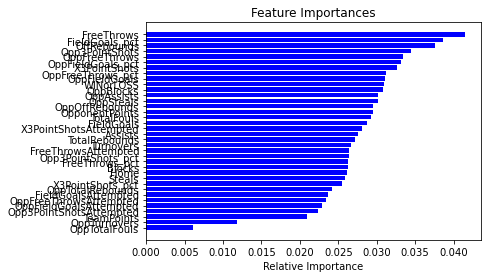

In [14]:
fig = plt.figure()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()